# COVID-19 Analysis

This notebook performs visualisation, analysis and forecasting of recorded country-level COVID-19 infections and fatalities.

Data is updated daily and comes from the European Centre for Disease Prevention and Control (ECDC) at this link: 
- https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
- an alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

In [1]:
import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-06-04    4      6  2020    758      24             Afghanistan    AF   
1 2020-06-03    3      6  2020    759       5             Afghanistan    AF   
2 2020-06-02    2      6  2020    545       8             Afghanistan    AF   
3 2020-06-01    1      6  2020    680       8             Afghanistan    AF   
4 2020-05-31   31      5  2020    866       3             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia

In [2]:
# force the date to be in the right format 
df0['dateRep'] = pd.to_datetime(df0['dateRep'],format='%d/%m/%Y').dt.date
df0['dateRep'].tail()

21333    2020-03-25
21334    2020-03-24
21335    2020-03-23
21336    2020-03-22
21337    2020-03-21
Name: dateRep, dtype: object

## Infections

Now that the data is loaded, let's first look at the infection count ('cases') data
- do some cleaning and reformating:

In [3]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]

In [4]:
# pivot the table
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories  Afghanistan  Albania  Algeria  Andorra  Angola  \
dateRep                                                                   
2020-05-31                     866.0     23.0    133.0      0.0     7.0   
2020-06-01                     680.0     15.0    127.0      0.0     2.0   
2020-06-02                     545.0      6.0    119.0      1.0     0.0   
2020-06-03                     759.0     21.0    113.0     79.0     0.0   
2020-06-04                     758.0     20.0      0.0      7.0     0.0   

countriesAndTerritories  Anguilla  Antigua_and_Barbuda  Argentina  Armenia  \
dateRep                                                                      
2020-05-31                    0.0                  0.0      795.0    251.0   
2020-06-01                    0.0                  0.0      637.0    355.0   
2020-06-02                    0.0                  0.0      564.0    210.0   
2020-06-03                    0.0                  0.0      904.0    517.0   
2020-06-04                    0.0                  1.0      949.0    515.0   

countriesAndTerritories  Aruba  ...  United_States_Virgin_Islands  \
dateRep                         ...                                 
2020-05-31                 0.0  ...                           0.0   
2020-06-01                 0.0  ...                           0.0   
2020-06-02                 0.0  ...                           1.0   
2020-06-03                 0.0  ...                           0.0   
2020-06-04                 0.0  ...                           0.0   

countriesAndTerritories  United_States_of_America  Uruguay  Uzbekistan  \
dateRep                                                                  
2020-05-31                                23297.0      5.0        41.0   
2020-06-01                                19807.0      2.0       108.0   
2020-06-02                                21086.0      2.0        56.0   
2020-06-03                                20544.0      1.0        51.0   
2020-06-04                                19699.0      2.0       105.0   

countriesAndTerritories  Venezuela  Vietnam  Western_Sahara  Yemen  Zambia  \
dateRep                                                                      
2020-05-31                    90.0      0.0             0.0   23.0     0.0   
2020-06-01                    51.0      1.0             0.0   13.0     0.0   
2020-06-02                   152.0      0.0             0.0   31.0    32.0   
2020-06-03                   157.0      0.0             0.0   45.0     0.0   
2020-06-04                   133.0      0.0             0.0    4.0     0.0   

countriesAndTerritories  Zimbabwe  
dateRep                            
2020-05-31                   14.0  
2020-06-01                    4.0  
2020-06-02                   25.0  
2020-06-03                    3.0  
2020-06-04                   16.0  

[5 rows x 210 columns]

In [5]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>1000]]
df2.sum().sort_values(ascending=False).head()

countriesAndTerritories
United_States_of_America    1851520.0
Brazil                       584016.0
Russia                       432277.0
United_Kingdom               279856.0
Spain                        240326.0
dtype: float64

In [6]:
# reorder the columns based on the total infection count
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories  United_States_of_America   Brazil   Russia  \
dateRep                                                               
2020-05-31                                23297.0  33274.0   8952.0   
2020-06-01                                19807.0  16409.0   9268.0   
2020-06-02                                21086.0  11598.0  17898.0   
2020-06-03                                20544.0  28936.0      0.0   
2020-06-04                                19699.0  28633.0   8536.0   

countriesAndTerritories  United_Kingdom  Spain  Italy   India  Germany  \
dateRep                                                                  
2020-05-31                       1604.0  201.0  416.0  8380.0    286.0   
2020-06-01                       1936.0  209.0  355.0  8392.0    333.0   
2020-06-02                       1570.0  294.0  178.0  8171.0    213.0   
2020-06-03                       1653.0  394.0  318.0  8909.0    342.0   
2020-06-04                       1871.0    0.0  321.0  9304.0    394.0   

countriesAndTerritories    Peru  Turkey  ...  Central_African_Republic  \
dateRep                                  ...                             
2020-05-31               7386.0   983.0  ...                      88.0   
2020-06-01               8805.0   839.0  ...                      49.0   
2020-06-02               5563.0   827.0  ...                      58.0   
2020-06-03                  0.0   786.0  ...                     104.0   
2020-06-04               8875.0   867.0  ...                      16.0   

countriesAndTerritories  Albania  Costa_Rica  New_Zealand  Kosovo  Nicaragua  \
dateRep                                                                        
2020-05-31                  23.0        25.0          0.0    16.0        0.0   
2020-06-01                  15.0         9.0          0.0     0.0        0.0   
2020-06-02                   6.0        28.0          0.0     0.0        0.0   
2020-06-03                  21.0        21.0          0.0     3.0      359.0   
2020-06-04                  20.0        52.0          0.0    75.0        0.0   

countriesAndTerritories  Zambia  Tunisia  Latvia  Paraguay  
dateRep                                                     
2020-05-31                  0.0      5.0     1.0      47.0  
2020-06-01                  0.0      1.0     1.0      22.0  
2020-06-02                 32.0      7.0     5.0       9.0  
2020-06-03                  0.0      2.0     8.0      18.0  
2020-06-04                  0.0      1.0     0.0      57.0  

[5 rows x 117 columns]

Now we can start generating some plots of the infection counts:

In [7]:
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=28)
date_range = [first_date,last_date]

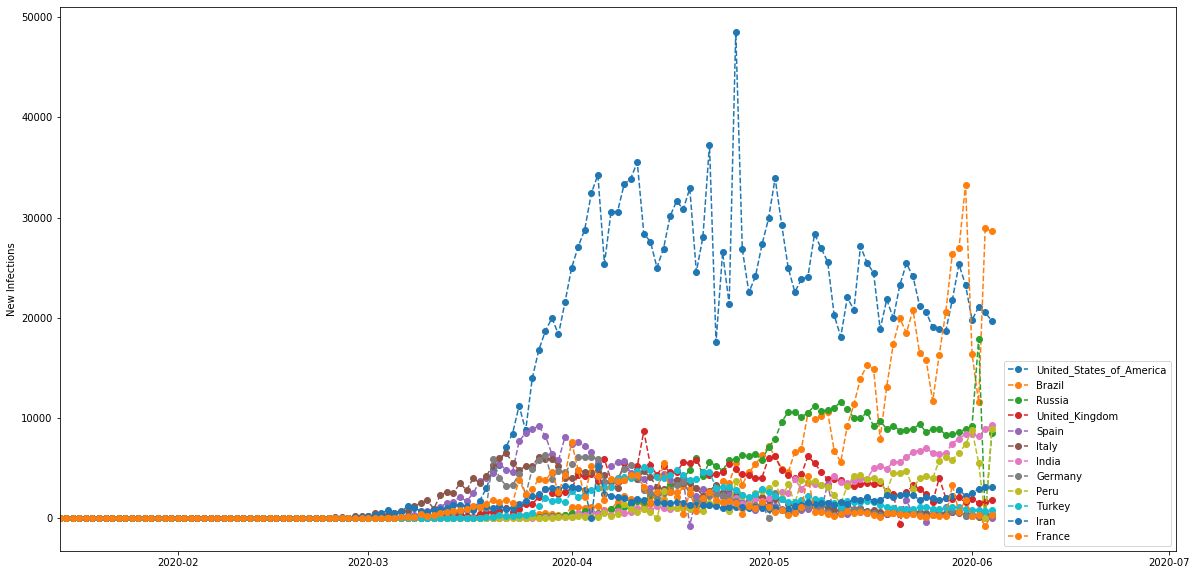

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:12],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

## Smoothed Plots of Daily Infections

The curves are easier to interpret once we smooth them a little. 
We'll use a 2-week moving average.

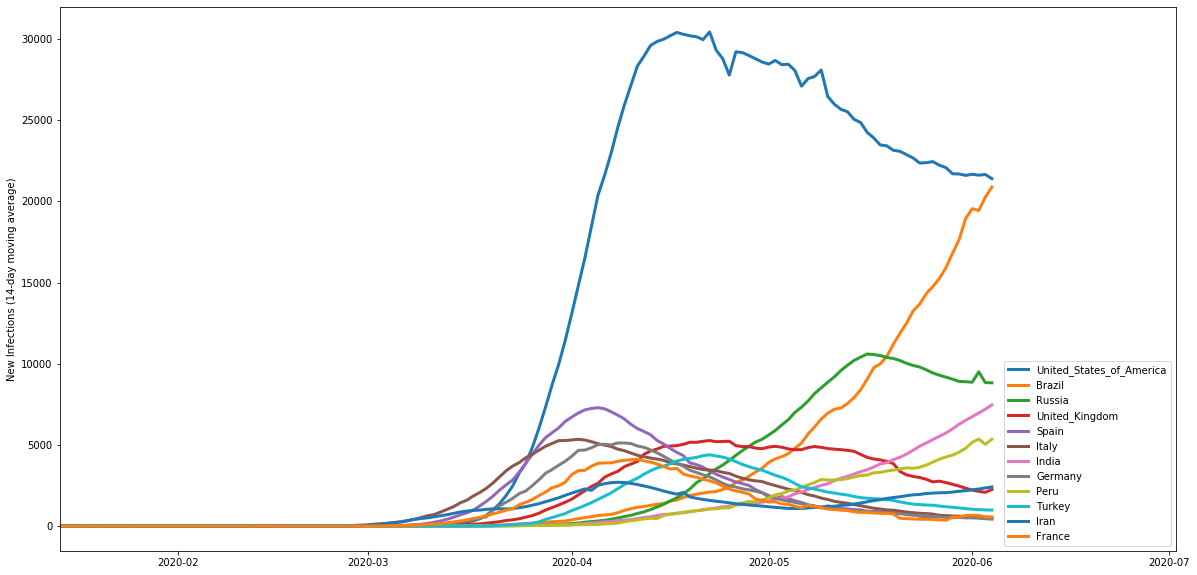

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:12].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Infections (14-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

Zoom in the y-axis frrom the previous plot

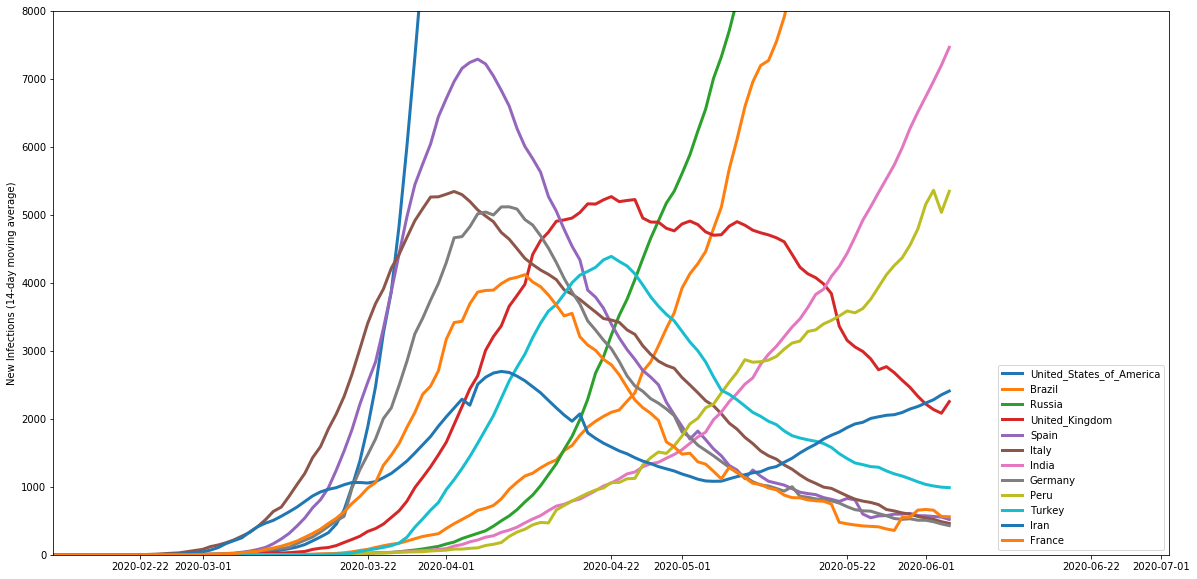

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:12].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Infections (14-day moving average)")
plt.xlim([first_date + dt.timedelta(days=28),last_date])
plt.ylim([0,8000])
plt.legend(df2.columns.values,loc=4);

## Cumulative Infection Counts

Now let's have a look at the cumulative infection data

In [11]:
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories  United_States_of_America    Brazil    Russia  \
dateRep                                                                 
2020-05-31                              1770384.0  498440.0  396575.0   
2020-06-01                              1790191.0  514849.0  405843.0   
2020-06-02                              1811277.0  526447.0  423741.0   
2020-06-03                              1831821.0  555383.0  423741.0   
2020-06-04                              1851520.0  584016.0  432277.0   

countriesAndTerritories  United_Kingdom     Spain     Italy     India  \
dateRep                                                                 
2020-05-31                     272826.0  239429.0  232664.0  182143.0   
2020-06-01                     274762.0  239638.0  233019.0  190535.0   
2020-06-02                     276332.0  239932.0  233197.0  198706.0   
2020-06-03                     277985.0  240326.0  233515.0  207615.0   
2020-06-04                     279856.0  240326.0  233836.0  216919.0   

countriesAndTerritories   Germany      Peru    Turkey  ...  \
dateRep                                                ...   
2020-05-31               181482.0  155671.0  163103.0  ...   
2020-06-01               181815.0  164476.0  163942.0  ...   
2020-06-02               182028.0  170039.0  164769.0  ...   
2020-06-03               182370.0  170039.0  165555.0  ...   
2020-06-04               182764.0  178914.0  166422.0  ...   

countriesAndTerritories  Central_African_Republic  Albania  Costa_Rica  \
dateRep                                                                  
2020-05-31                                  962.0   1122.0      1047.0   
2020-06-01                                 1011.0   1137.0      1056.0   
2020-06-02                                 1069.0   1143.0      1084.0   
2020-06-03                                 1173.0   1164.0      1105.0   
2020-06-04                                 1189.0   1184.0      1157.0   

countriesAndTerritories  New_Zealand  Kosovo  Nicaragua  Zambia  Tunisia  \
dateRep                                                                    
2020-05-31                    1154.0  1064.0      759.0  1057.0   1076.0   
2020-06-01                    1154.0  1064.0      759.0  1057.0   1077.0   
2020-06-02                    1154.0  1064.0      759.0  1089.0   1084.0   
2020-06-03                    1154.0  1067.0     1118.0  1089.0   1086.0   
2020-06-04                    1154.0  1142.0     1118.0  1089.0   1087.0   

countriesAndTerritories  Latvia  Paraguay  
dateRep                                    
2020-05-31               1065.0     964.0  
2020-06-01               1066.0     986.0  
2020-06-02               1071.0     995.0  
2020-06-03               1079.0    1013.0  
2020-06-04               1079.0    1070.0  

[5 rows x 117 columns]

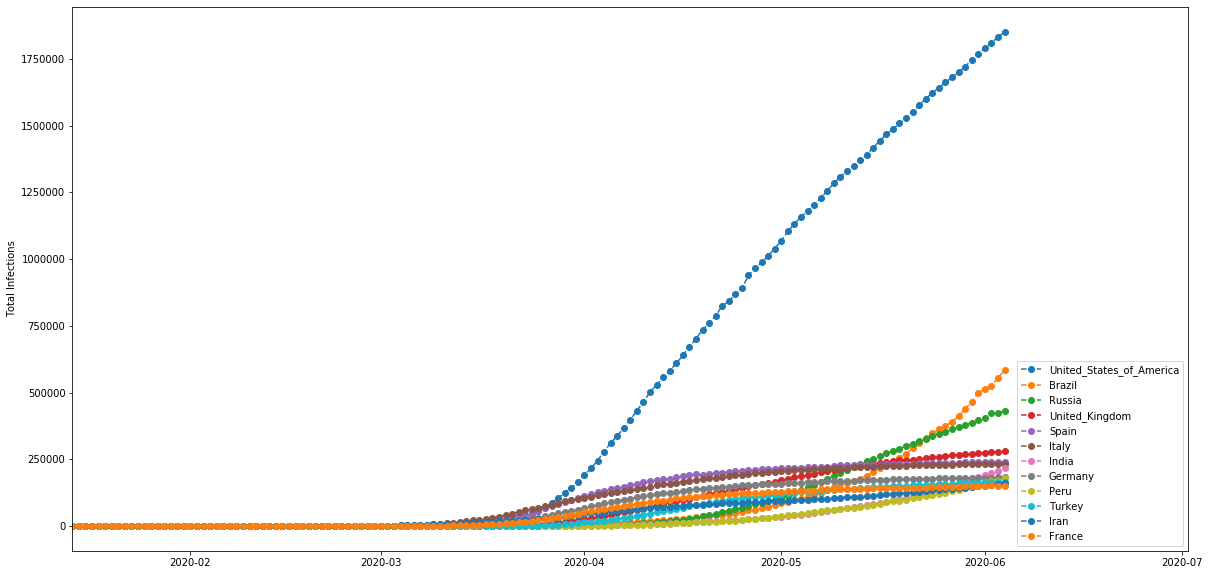

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

Zoom in the y-axis

(0, 300000)

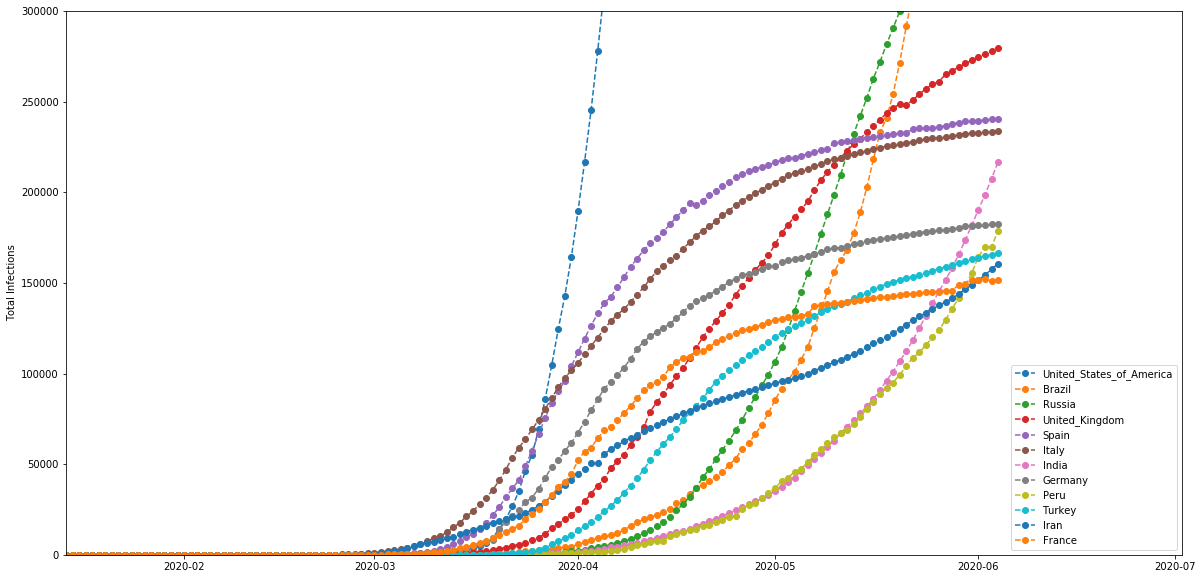

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4)
plt.ylim([0,300000])

Ploting the same data on a logarithmic scale

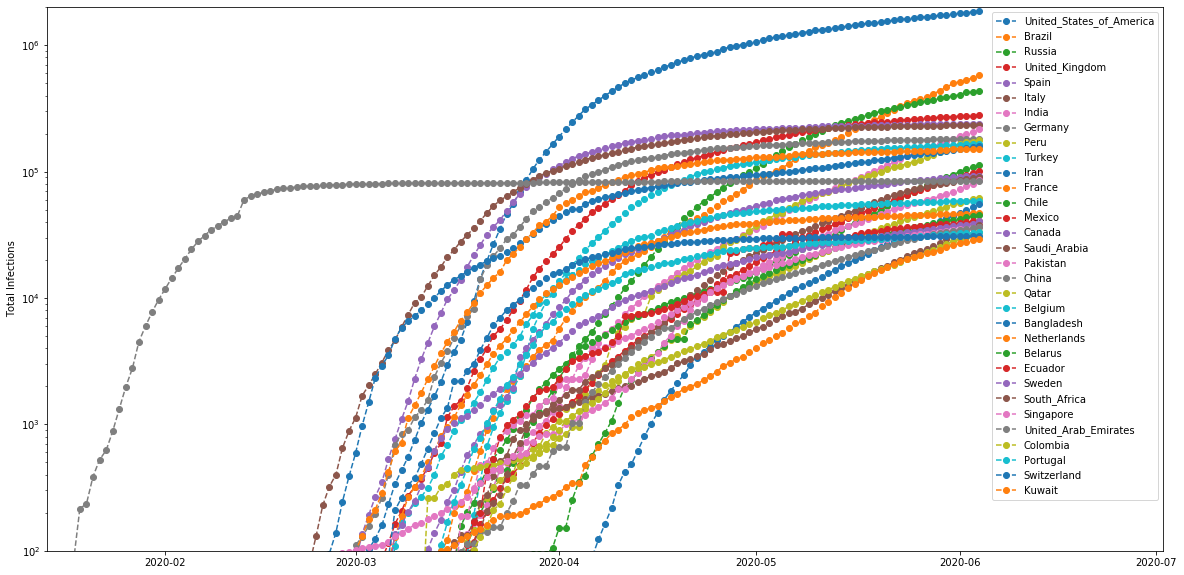

In [14]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,2000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

# Mortality data

The infection count data depends heavily on the testing regime followed in the different countries|, making comparison across countries problematic. 

Now let's look at the more reliable fatality data.

In [15]:
# pivot the original dataframe to extract the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>50]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories  United_States_of_America  United_Kingdom  Italy  \
dateRep                                                                    
2020-05-29                                 1175.0           377.0   70.0   
2020-05-30                                 1219.0           324.0   87.0   
2020-05-31                                  945.0           215.0  111.0   
2020-06-01                                  602.0           113.0   75.0   
2020-06-02                                  764.0           556.0   60.0   
2020-06-03                                 1034.0           324.0   55.0   
2020-06-04                                  994.0           359.0   71.0   

countriesAndTerritories  Brazil  France  Spain  Mexico  Belgium  Germany  \
dateRep                                                                    
2020-05-29               1156.0    66.0    2.0   447.0     24.0     39.0   
2020-05-30               1124.0    52.0    4.0   371.0     55.0     39.0   
2020-05-31                956.0    57.0    2.0   364.0     10.0     11.0   
2020-06-01                480.0    31.0  813.0   151.0     14.0     11.0   
2020-06-02                623.0    31.0    0.0   237.0     19.0     11.0   
2020-06-03               1262.0   107.0    0.0   470.0     19.0     29.0   
2020-06-04               1349.0    81.0    0.0  1091.0     17.0     30.0   

countriesAndTerritories  Iran  ...  Kenya  Lithuania  Estonia  Oman  Chad  \
dateRep                        ...                                          
2020-05-29               63.0  ...    3.0        2.0      0.0   2.0   1.0   
2020-05-30               50.0  ...    4.0        0.0      1.0   0.0   0.0   
2020-05-31               57.0  ...    1.0        2.0      0.0   2.0   0.0   
2020-06-01               63.0  ...    1.0        0.0      1.0   5.0   0.0   
2020-06-02               81.0  ...    5.0        0.0      0.0   3.0   1.0   
2020-06-03               64.0  ...    2.0        1.0      0.0   9.0   0.0   
2020-06-04               70.0  ...    3.0        0.0      1.0   8.0   0.0   

countriesAndTerritories  Niger  Thailand  Burkina_Faso  El_Salvador  Andorra  
dateRep                                                                       
2020-05-29                 0.0       0.0           0.0          0.0      0.0  
2020-05-30                 0.0       0.0           0.0          4.0      0.0  
2020-05-31                 0.0       0.0           0.0          3.0      0.0  
2020-06-01                 0.0       0.0           0.0          0.0      0.0  
2020-06-02                 1.0       0.0           0.0          0.0      0.0  
2020-06-03                 0.0       1.0           0.0          3.0      0.0  
2020-06-04                 0.0       0.0           0.0          2.0      0.0  

[7 rows x 88 columns]

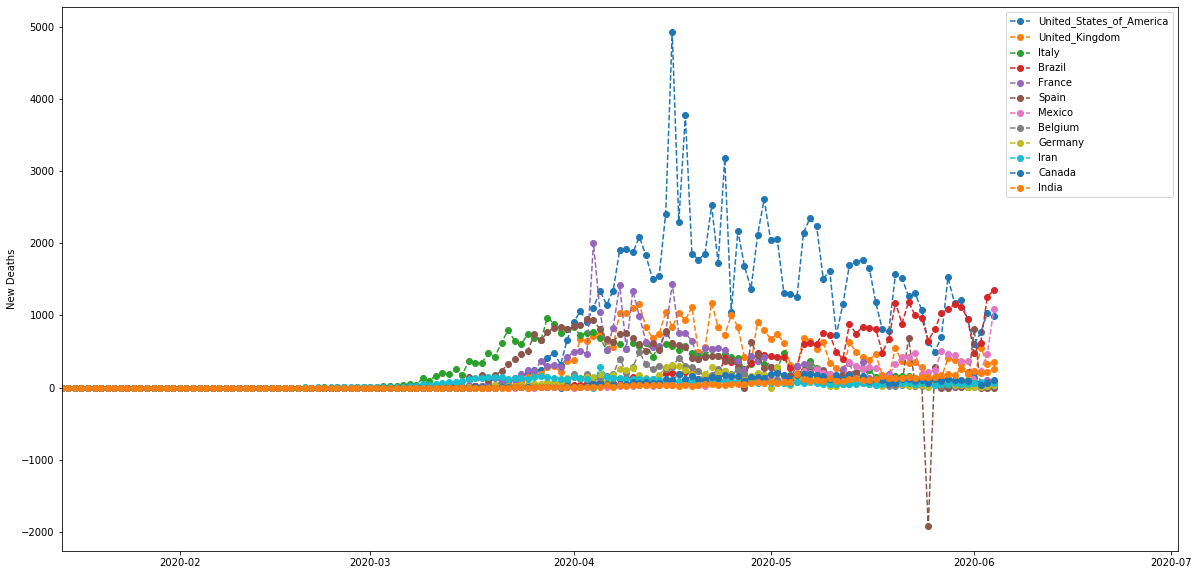

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

## Smoothed Plot of Daily Fatalities

Looking at moving average plots makes it is easier to see the trends. 

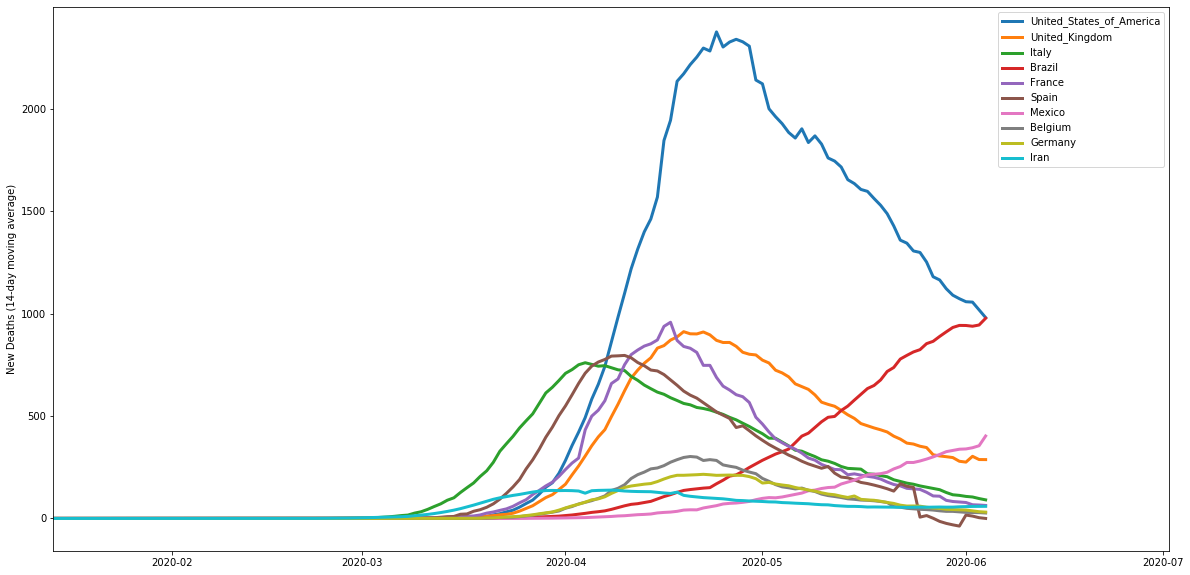

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:10].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Deaths (14-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

The previous plot showed the 10 countries with the most fatalities. 

Now let's plot the next 10.

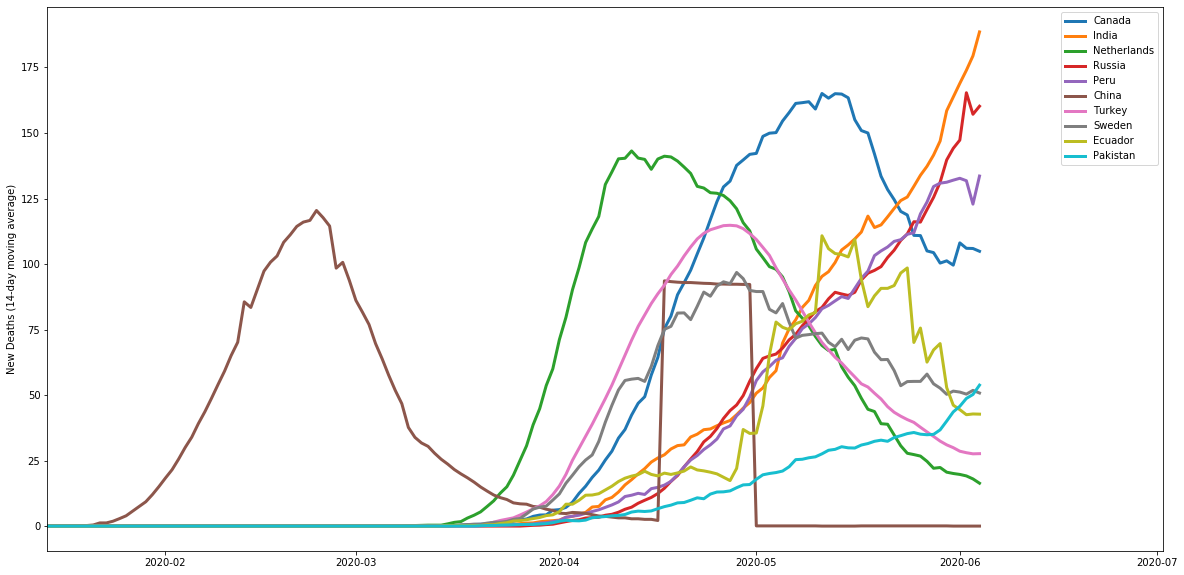

In [18]:
#plot the next 10 countries
df_deaths_selected = df_deaths.iloc[:,10:20]
plt.figure(figsize=(20,10))
plt.plot(df_deaths_selected.rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Deaths (14-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths_selected.columns.values,loc=1);

The second peak for China is due to the country updating their mortality count in May.  

## Cumulative Fatalities

Now we graph the total fatalities 

In [19]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories  United_States_of_America  United_Kingdom    Italy  \
dateRep                                                                      
2020-05-31                               103781.0         38376.0  33340.0   
2020-06-01                               104383.0         38489.0  33415.0   
2020-06-02                               105147.0         39045.0  33475.0   
2020-06-03                               106181.0         39369.0  33530.0   
2020-06-04                               107175.0         39728.0  33601.0   

countriesAndTerritories   Brazil   France    Spain   Mexico  Belgium  Germany  \
dateRep                                                                         
2020-05-31               28834.0  28771.0  27127.0   9779.0   9453.0   8500.0   
2020-06-01               29314.0  28802.0  27940.0   9930.0   9467.0   8511.0   
2020-06-02               29937.0  28833.0  27940.0  10167.0   9486.0   8522.0   
2020-06-03               31199.0  28940.0  27940.0  10637.0   9505.0   8551.0   
2020-06-04               32548.0  29021.0  27940.0  11728.0   9522.0   8581.0   

countriesAndTerritories    Iran  ...  Kenya  Lithuania  Estonia  Oman  Chad  \
dateRep                          ...                                          
2020-05-31               7734.0  ...   63.0       70.0     67.0  42.0  65.0   
2020-06-01               7797.0  ...   64.0       70.0     68.0  47.0  65.0   
2020-06-02               7878.0  ...   69.0       70.0     68.0  50.0  66.0   
2020-06-03               7942.0  ...   71.0       71.0     68.0  59.0  66.0   
2020-06-04               8012.0  ...   74.0       71.0     69.0  67.0  66.0   

countriesAndTerritories  Niger  Thailand  Burkina_Faso  El_Salvador  Andorra  
dateRep                                                                       
2020-05-31                64.0      57.0          53.0         46.0     51.0  
2020-06-01                64.0      57.0          53.0         46.0     51.0  
2020-06-02                65.0      57.0          53.0         46.0     51.0  
2020-06-03                65.0      58.0          53.0         49.0     51.0  
2020-06-04                65.0      58.0          53.0         51.0     51.0  

[5 rows x 88 columns]

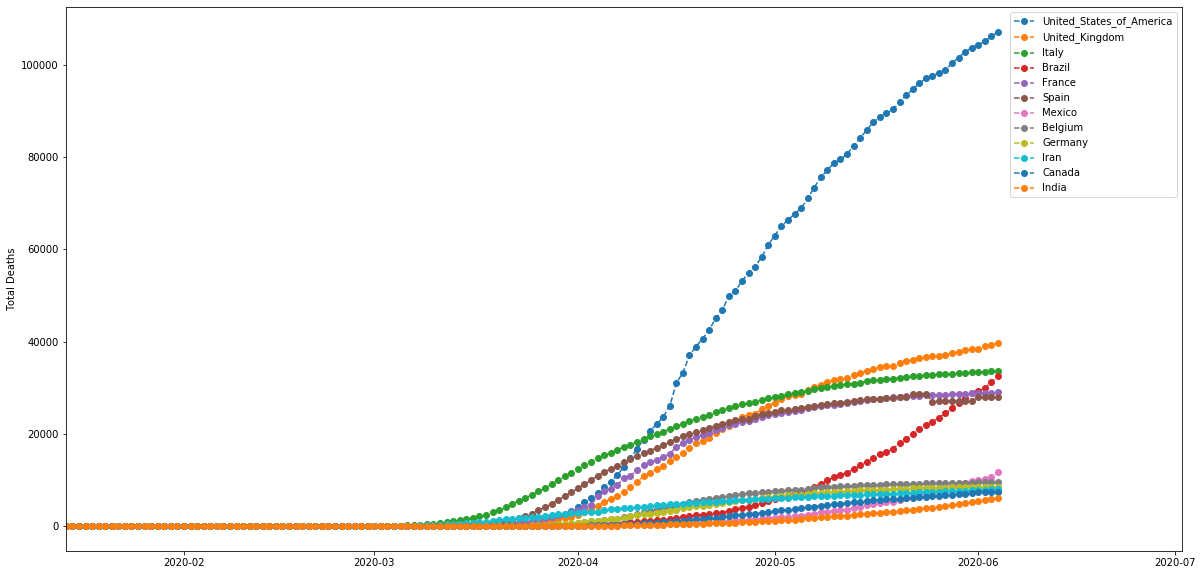

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

Let's also plot the cumulative values on a logarithmic scale.

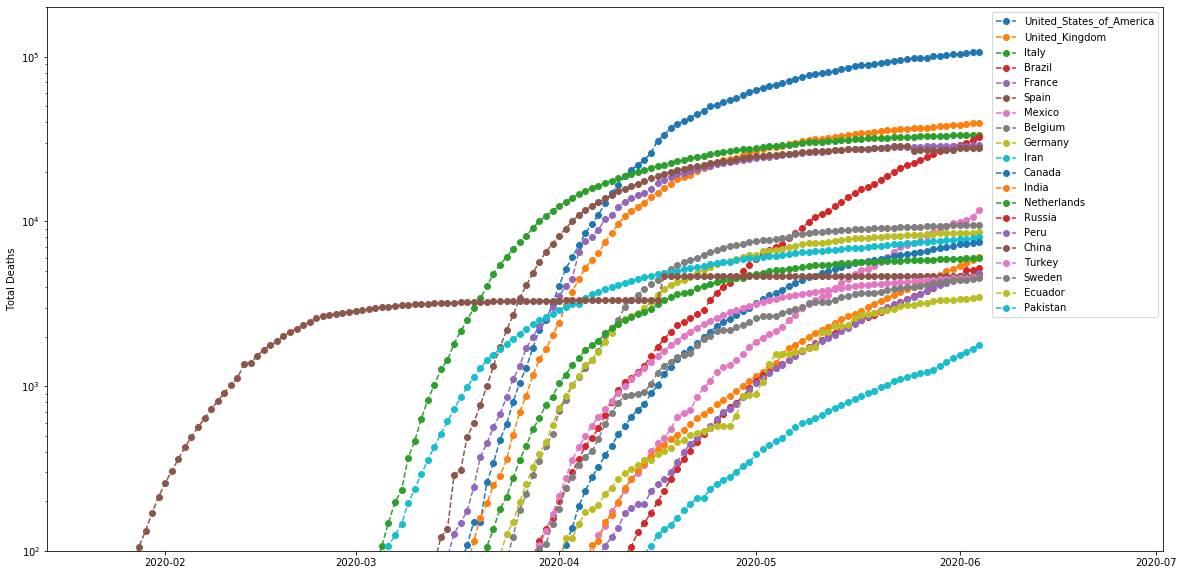

In [21]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:20],'o--')
plt.yscale('log')
plt.ylim([100,200000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

## Comparing growth rates

To compare the growth in different countries, we can line up the curves around the timepoint at which each country observed its 20th fatality 


In [22]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [23]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

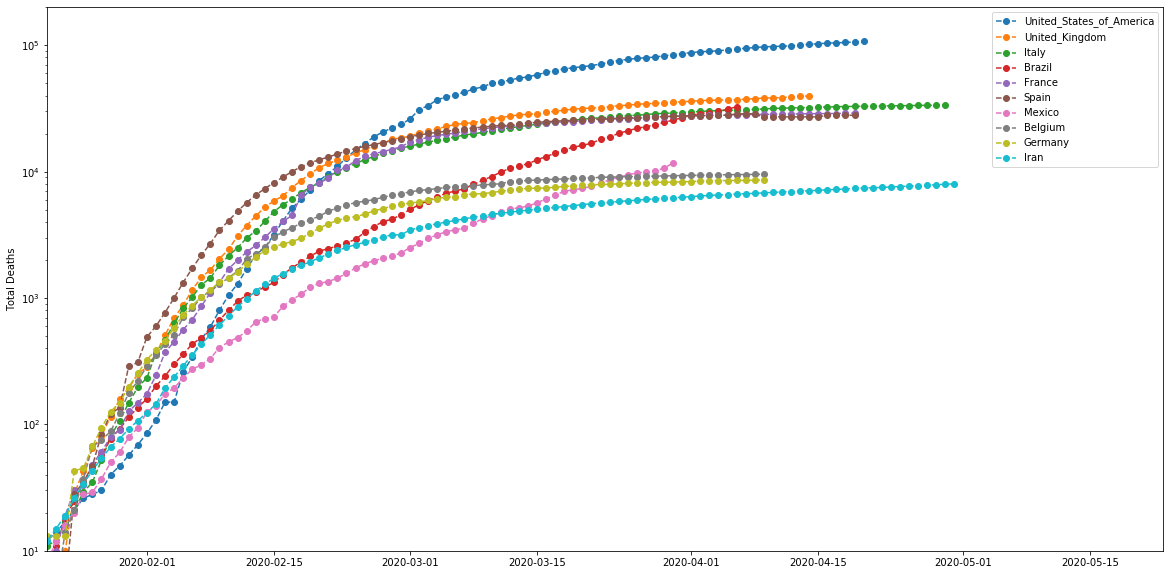

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([10,200000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=120)])
plt.legend(df_deaths_cum.columns.values, loc=0);

## Forecasting with a Generalised Logistic Growth Curve

Generalised logistic growth curves are often used to model population growth over time. For an epidemic the population being modeled could be the infection count or the mortality data.  

In [25]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     #y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

# TODO: it might also be worth trying the even more general version of the equation: 
def generalised_logistic_2(x, a, b, c, d, e, f, g):
     y = a / np.power(f + b * np.exp( -c * (x + d) ),1/e) + g
     return y

We now fit a generalised logistc growth curve model through the data for Italy to see how well it fits the observed data and decide whether we can use it for predicting forward. Note that when fitting the model, we weight down the older data using an exponential decay function. 

In [26]:
# now let's have a look at the data for Italy to see if we can predict it going forward
# we will fit only the data after the 20th fatality

import numpy as np
ydata = df_deaths_cum['Italy']
ydata = ydata[ydata > 20]
xdata = np.array(range(len(ydata)))

In [27]:
# now let's fit the curve
from scipy.optimize import curve_fit

# reduce the importance of older data by an exponential decay factor:
decay = .95
# TODO: this value should be set empirically to minimise the forecast errors up to the current time 

# restrict the range of parameter values with upper and lower bounds
bounds =([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# initial parameter settings (these were set after a bit of playing around with the data)
p0=[2*ydata.max(), 10, .1, 0.0, 1.0]

# estimate the model:
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=False, bounds=bounds, p0=p0, maxfev=10000)

# print the parameters along with their error estimates
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print("parameter estimates: ", popt)
print("standard error:      ", np.sqrt(np.diag(pcov)))

parameter estimates:  [34875.30941917     8.13729953     0.05237189   145.79925768     0.00069841]
standard error:       [  38.10630008  135.80592389    0.00069271 1197.98762131    0.04384203]


The parameter estimates along with their uncertainty are shown above. 

Note that the first parameter is the total number of deaths predicted at the end of the outbreak.

### Plotting predictions

Now let's plot the predicted curve.

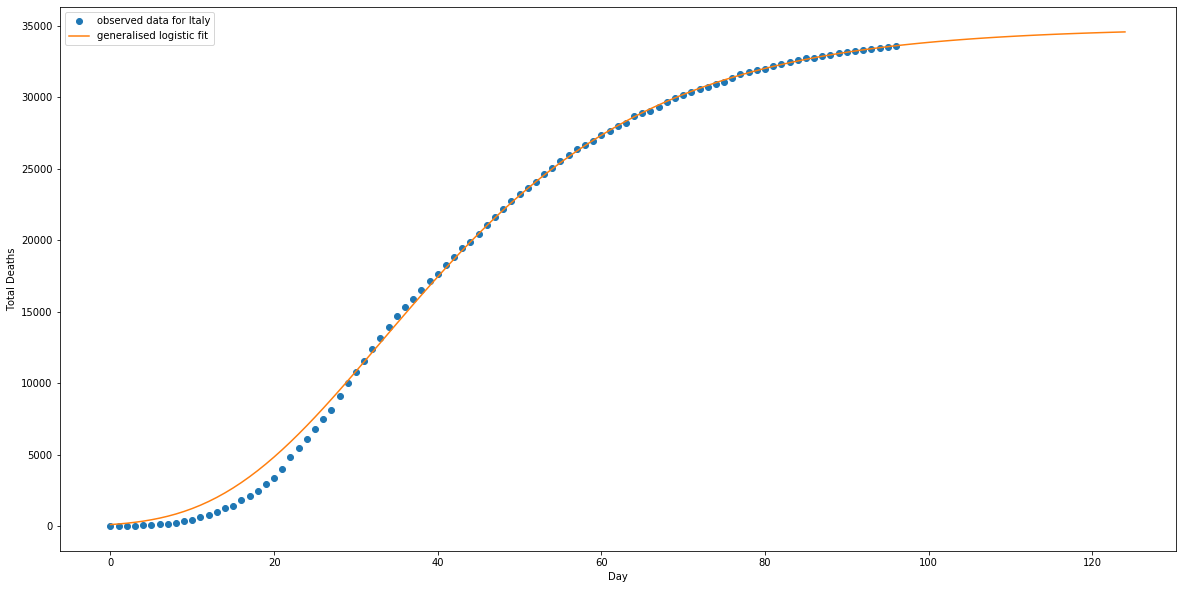

In [28]:
plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = np.array(range(len(ydata)+28))
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths");
plt.xlabel("Day");

The fit looks pretty good, especially for the more recent data!

### Investigating the Error

Calculate the residuals, the MSE and RMSE for the fit.

In [29]:
error = ydata - generalised_logistic(xdata, *popt)
sse = np.power(error,2).sum()
mse = sse/len(error)
rmse = np.sqrt(mse)
rmse

509.17913077193197

Now let's plot the residuals to see how the error varies over time.

Text(0.5, 0, 'Day')

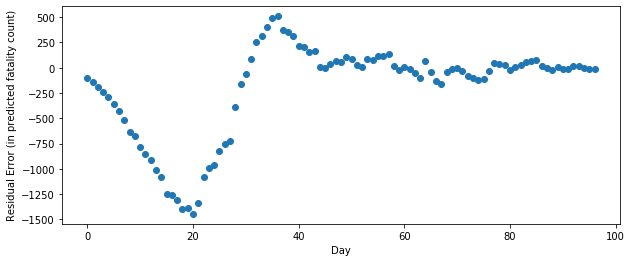

In [30]:
plt.figure(figsize=(10,4))
plt.plot(xdata, error, 'o')
plt.ylabel("Residual Error (in predicted fatality count)")
plt.xlabel("Day")

As expected, the error is much larger for older observations. This is due to the fact that we weighted down the importance (squared error) for the older data using an exponetial decay.

The fitted curve is, however, systematically overestimiating the older values. This may be due to the change in the propagation of the virus that resulted from the lockdown measures imposed: Initially the outbreak was increasing at a faster rate and destined for a much larger final fatality value, but then lockdown and other measures for containing the virus were introduced, changing its dynamics and causing a new and smaller logistic curve to develop.

To see the effective residuals that were used to fit the model, we can plot the residuals weighted by the decay function.  

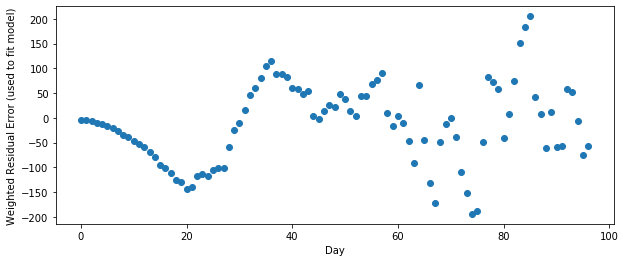

In [31]:
plt.figure(figsize=(10,4))
n = len(ydata)
weights = 1/np.power(decay,np.array(range(n)))
weights = weights/(weights.sum()) # normalise weights 
weights = n*weights               # make them sum to n
plt.plot(xdata, error*weights, 'o')
plt.ylabel("Weighted Residual Error (used to fit model)")
plt.xlabel("Day");

## Adding confidence bounds

Let's try to add confidence bounds to the prediction. To do that we'll use the delta-method to calculate the uncertainty in the future values.
- NB: the calculated confidence intervals **GREATLY UNDERESTIMATE UNCERTAINTY**, since they assumes that the logistic growth model is correct, (which is almost certainly isn't)

In [32]:
# calculate confidence bands using the delta-method:

# 1) use sympy to find gradient of function
from sympy import symbols,exp,lambdify

x, a, b, c, d, e = symbols('x a b c d e')
y = a / (1 + b*exp(-c*(x+d)))**(1/e)
dy_da = lambdify([x,[a,b,c,d,e]],y.diff(a))
dy_db = lambdify([x,[a,b,c,d,e]],y.diff(b))
dy_dc = lambdify([x,[a,b,c,d,e]],y.diff(c))
dy_dd = lambdify([x,[a,b,c,d,e]],y.diff(d))
dy_de = lambdify([x,[a,b,c,d,e]],y.diff(e))

def gradient(x, params):
    return [dy_da(x,params),dy_db(x,params),dy_dc(x,params),dy_dd(x,params),dy_de(x,params)] 

# 2) multiply gradient by covariance to compute variance of prediction \hat{y}
def variance_in_y_hat(x, params, cov):
    g = np.array(gradient(x,params)) 
    return g.dot(cov).dot(g)

# 3) scale by estimated standard deviation by critical value 1.96 to get 95% confidence interval
c = 1.96
intervals = c * np.sqrt([variance_in_y_hat(x,popt,pcov) for x in xpred])

# 4) finally, for a prediction interval, we need also to take into account the variance in y itself, (not just in \hat{y}), so add mse
intervals = c * np.sqrt([variance_in_y_hat(x,popt,pcov) for x in xpred] + mse)
#n = len(ydata)
#intervals = c * np.sqrt([variance_in_y_hat(x,popt,pcov) for x in xpred] + mse/np.power(decay,np.array(xpred)-n))

# TODO: improve these prediction bands: 
# (1) use the 95% critical value from t-distribution rather than gaussian (with  degree of freedom df=n-5), and sse/df instead of mse
# (2) check whether bounds need to increase with # steps into future
# (3) compare with bootstrap based estimates for the bounds

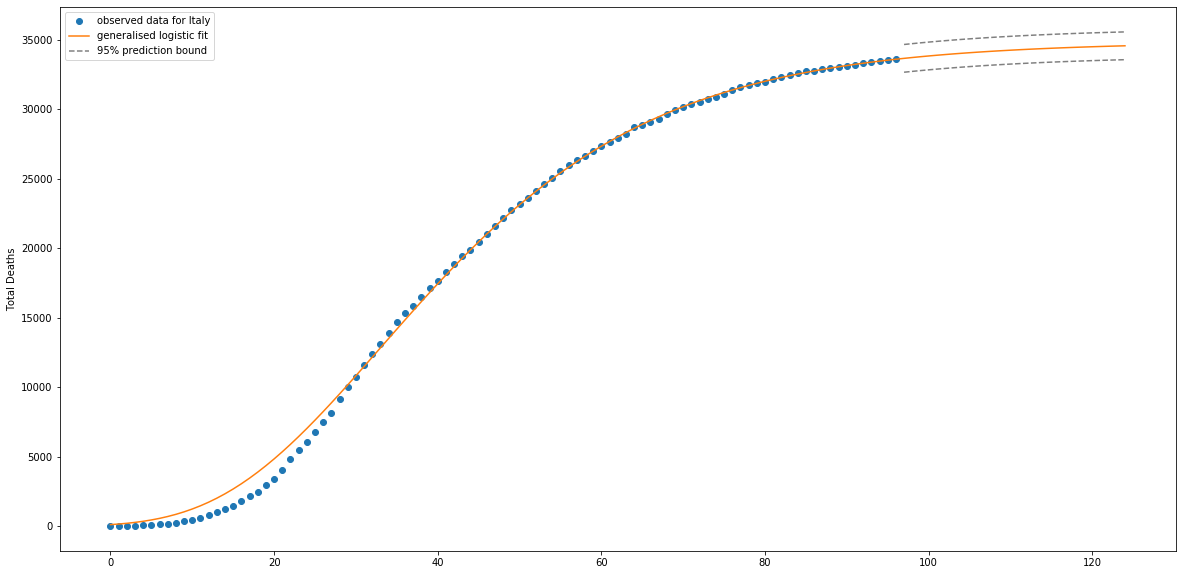

In [33]:
# plot the predictions with the prediction intervals
# NB: the interval GREATLY UNDERESTIMATES UNCERTAINTY 
# (since it assumes that the model is correct, which is almost certainly isn't)

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
n = len(ydata)
xpred = range(n+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.plot(xpred[n:], ypred[n:]+intervals[n:], '--', color='grey', label='95% prediction bound')
plt.plot(xpred[n:], ypred[n:]-intervals[n:], '--', color='grey')

plt.legend(loc='best')
plt.ylabel("Total Deaths");

## Plotting predictions for other countries


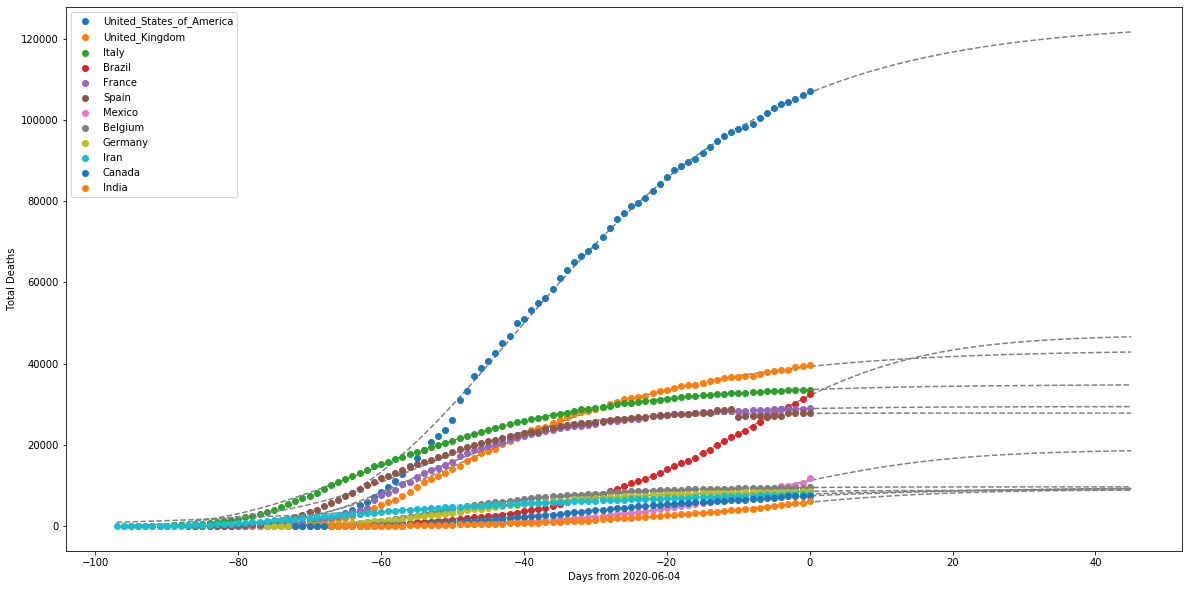

In [34]:
# plot other countries with high fatality counts

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:12]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
#plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.xlabel("Days from "+str(df0['dateRep'].max()))
plt.legend(loc=0);

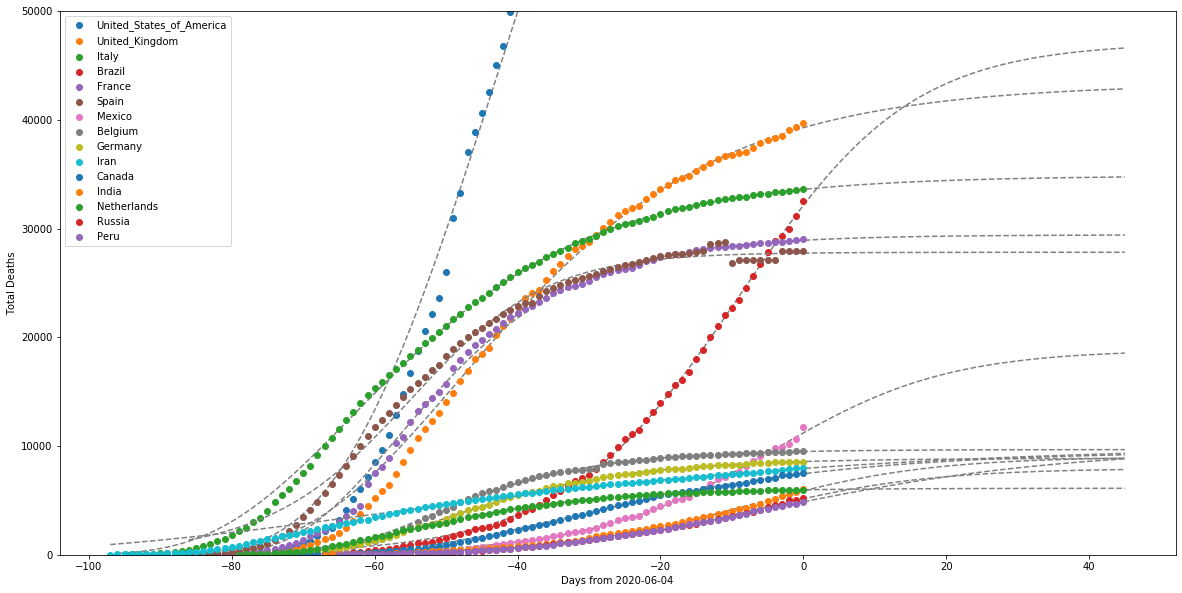

In [35]:
# zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:16]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,50000])
plt.xlabel("Days from "+str(df0['dateRep'].max()))
plt.legend(loc=0);

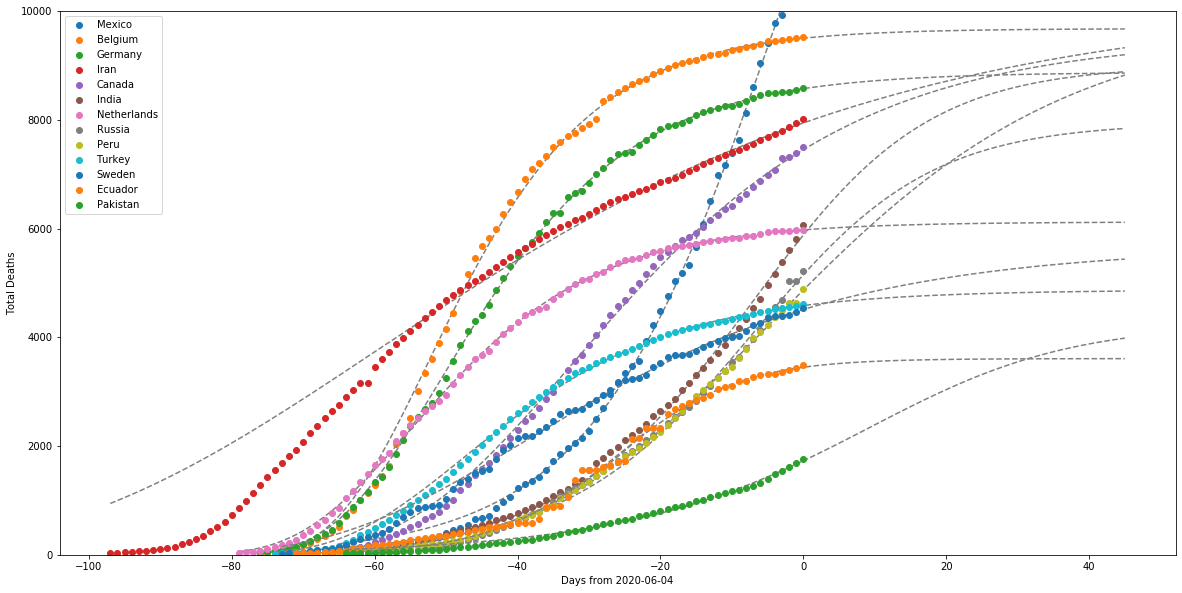

In [36]:
# remove top 6 to zoom in further the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,6:20]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,10000])
plt.xlabel("Days from "+str(df0['dateRep'].max()))
plt.legend(loc=0);

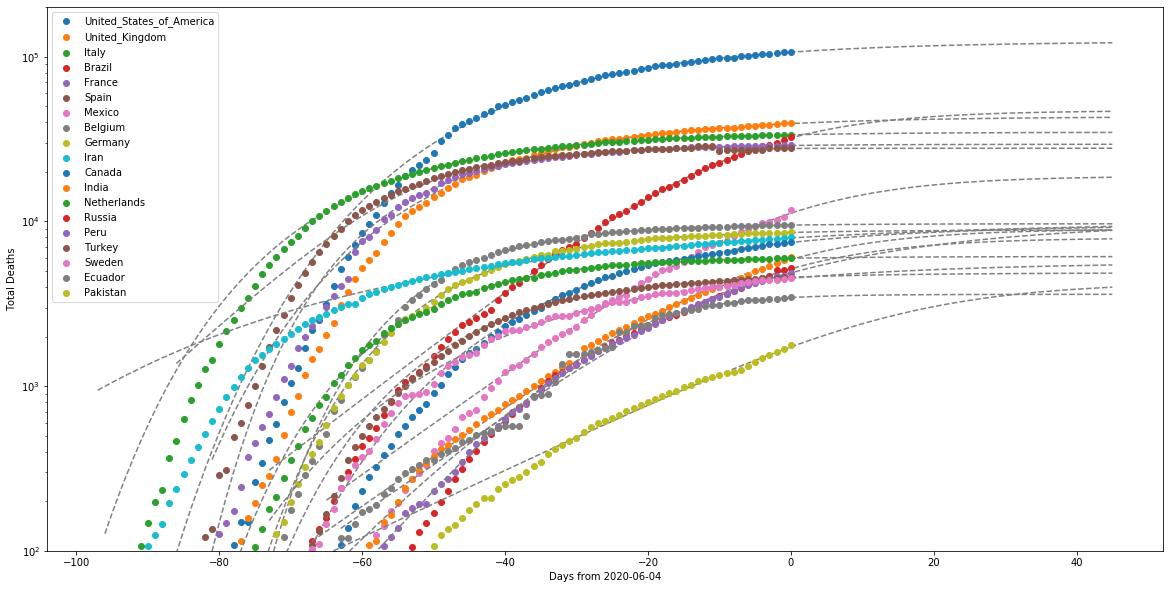

In [37]:
# log scale on the y-axis

plt.figure(figsize=(20,10))


for col in df_deaths_cum.iloc[:,:20]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,200000])
plt.xlabel("Days from "+str(df0['dateRep'].max()))
plt.legend(loc=0);

## Mortality forecasts for each country

We'll now show seperate graphs for each country, with confidence bounds for each.
- The countries are ordered by the number of fatalities observed up to today.
- Predictions based on data after the country reaches 20 fatalitites.
- Only countries with more than 100 fatalities in total are shown.

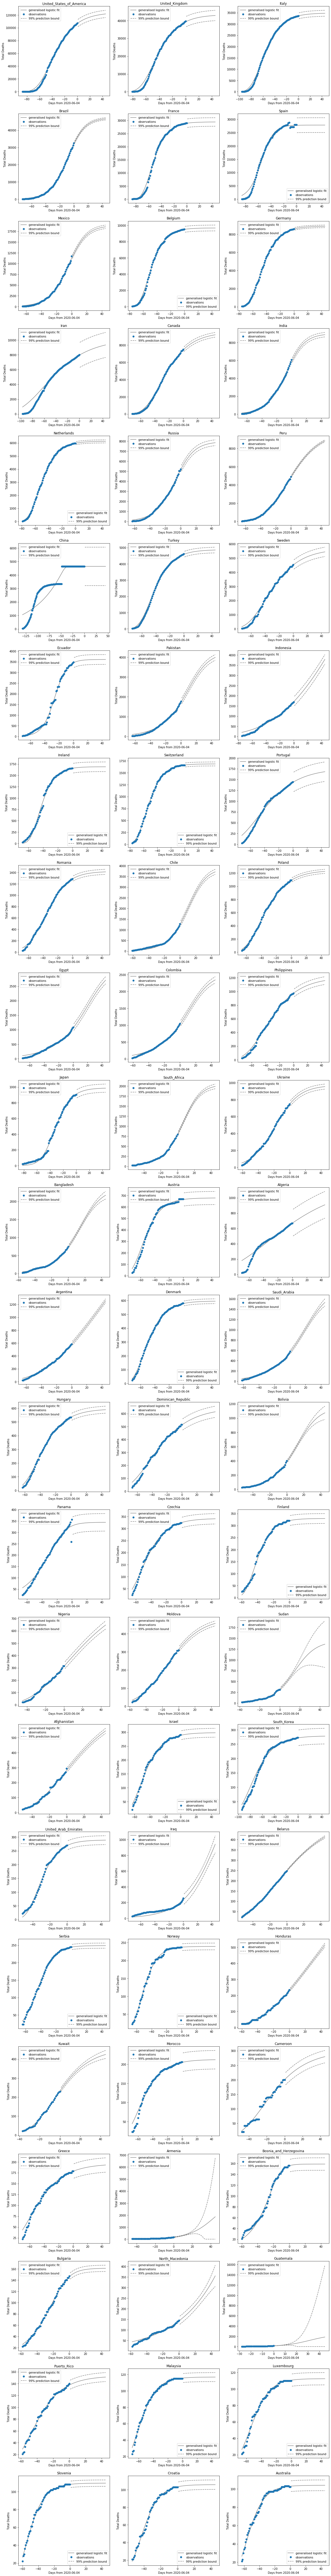

In [38]:
# plot each country's prediction with error bounds

plt.figure(figsize=(20,240))

c = 2.576; # use simple 99% bounds

count = 0
for col in df_deaths_cum.columns[df_deaths_cum.iloc[-1]>100]:
    
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    
    # compute predictions
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    
    # compute prediction interval
    error = ydata - generalised_logistic(xdata, *popt)
    mse = np.power(error,2).sum()/len(error)
    intervals = c * np.sqrt([variance_in_y_hat(x,popt,pcov) for x in xpred] + mse) 
    
    count = count + 1
    plt.subplot(34,3,count)
    
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '-', color='grey', label='generalised logistic fit')
    plt.plot(xdata+offset, ydata, 'o', label='observations')
    
    n = len(ydata)
    plt.plot(xpred[n:]+offset, ypred[n:]+intervals[n:], '--', color='grey', label='99% prediction bound')
    plt.plot(xpred[n:]+offset, (ypred[n:]-intervals[n:]).clip(min=0), '--', color='grey')
    
    plt.title(col)
    plt.ylabel("Total Deaths")
    plt.xlabel("Days from "+str(df0['dateRep'].max()))
    plt.legend(loc=0);
    